In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import torch
import os

import sys
sys.path.insert(0, '../trainingdata')
from datasaver import *
sys.path.insert(0, '../testproblems/tdarcy')
from manufacturedsolutions import *
sys.path.insert(0, '../ml')
from modelloader import loadmodelfromlabel
from NeuralOperator import NeuralOperator
from customlosses import *
from quadrature import *
from customlayers import discretize_functions
from basisfunctions import *

In [3]:
%load_ext autoreload
%autoreload 2

In [3]:
from NeuralOperator import NeuralOperator

logdir = '../../../nnlogs'
device = 'cpu'

sublogdir = 'systemnets/FNO'

NN = loadmodelfromlabel(model=NeuralOperator, label='NN', logdir=logdir, sublogdir=sublogdir, device=device)
# FNO = loadmodelfromlabel(model=NeuralOperator, label='FNO', logdir=logdir, sublogdir=sublogdir, device=device)
# DeepONet = loadmodelfromlabel(model=NeuralOperator, label='DeepONet', logdir=logdir, sublogdir=sublogdir, device=device)
# VarMiON = loadmodelfromlabel(model=NeuralOperator, label='VarMiON', logdir=logdir, sublogdir=sublogdir, device=device)
#dataNGO = loadmodelfromlabel(model=NeuralOperator, label='dataNGO', logdir=logdir, sublogdir=sublogdir, device=device)
datafreeNGO = loadmodelfromlabel(model=NeuralOperator, label='datafreeNGO', logdir=logdir, sublogdir=sublogdir, device=device)
modelNGO = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)
projection = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)
projection.hparams['modeltype'] = 'projection'
projection.hparams['dtype'] = torch.float64
projection.hparams['precision'] = 64



modeldict = {'Projection': projection,
             'NN': NN,
             #'DeepONet': DeepONet,
             #'VarMiON': VarMiON,
            #'Data NGO': dataNGO,
            'Data-free NGO': datafreeNGO,
            'Model NGO': modelNGO}

AttributeError: 'NeuralOperator' object has no attribute 'NN_forward'

In [10]:
# N_samples = 1000

# alpha = 0.05
# q_low = alpha/2
# q_high = 1 - q_low


# l = np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# # l = np.array([1])

# # l = np.array([0.4, 0.3, 0.2, 0.1, 0.05])
# L2_scaled_avg = np.zeros((len(modeldict),len(l)))
# yerr = np.zeros((len(modeldict),2,len(l)))

# size_title = 20
# size_ticklabels = 15
# size_axeslabels = 20

# # quadrature = GaussLegendreQuadrature2D(n_elements=1, Q=100)
# quadrature = UniformQuadrature2D(Q=100)
# x = torch.tensor(quadrature.xi_Omega, device=device)
# w = torch.tensor(quadrature.w_Omega, device=device)

# linestyles=['-','dotted','--','--','--','--','--','--','--','--']
# colors = ['black','C3','C1','C2','C3','C4']
# # markers = ['o','^','o','^','o','^','o']
    
# for i in range(len(l)):
#     print(l[i])
#     dataset = ManufacturedSolutionsSetDarcy(N_samples=N_samples, variables=['x','x'], l_min=[l[i],l[i]], l_max=[l[i],l[i]], device=device)
#     theta = dataset.theta
#     f = dataset.f
#     etat = dataset.etat
#     etab = dataset.etab
#     gl = dataset.gl
#     gr = dataset.gr
#     u = dataset.u
#     m=0
#     for model in modeldict:
#         u_exact = discretize_functions(u, x, dtype=modeldict[str(model)].hparams['dtype'], device=device)
#         u_hat = modeldict[str(model)].simforward(theta, f, etab, etat, gl, gr, x, u).detach()
#         L2_scaled_array = weightedrelativeL2_set(w, u_hat, u_exact).detach().cpu().numpy()
#         L2_scaled_avg[m,i] = np.average(L2_scaled_array)
#         q_l = np.quantile(L2_scaled_array, q_low)
#         q_h = np.quantile(L2_scaled_array, q_high)
#         yerr[m,:,i] = np.array([L2_scaled_avg[m,i] - q_l, -L2_scaled_avg[m,i] + q_h])
#         m+=1

# # L2_scaled_avg[L2_scaled_avg<0] = np.nan
# # yerr[yerr<0] = np.nan

# fig, ax = plt.subplots(1,1, figsize=(6, 4))
# fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

# plots = []
# plots.append(ax.axvspan(0.5,1, color='black', alpha=0.1, label='Training data range'))
# m=0
# ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.set_xlabel(r'Length scale $\lambda/L$', fontsize=size_axeslabels)
# ax.set_ylabel(r'Rel. L2 error $\frac{||\hat{u}-u||_2}{||u||_2}$', fontsize=size_axeslabels)
# ax.set_yscale('log')
# ax.set_xlim(0, 1.05)
# # ax.set_ylim(1e-7, 1e2)
# ax.set_yticks([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2])
# # ax.set_yticks([1e-6, 1e-4, 1e-2, 1e0, 1e2])
# # ax.set_xscale('log')
# ax.grid()
# ax.set_title('FNO', fontsize=size_title)
# for model in modeldict:
#     # ax.plot(l, L2_scaled_avg[m], color=colors[m], label=str(model), linestyle=linestyles[m], marker='o')
#     plots.append(ax.errorbar(l, L2_scaled_avg[m], yerr=yerr[m], fmt=".-", capsize=6, ms=15, label=str(model), color=colors[m], linestyle=linestyles[m]))
#         # plt.savefig(str(m)+".svg", bbox_inches='tight')#, transparent=True)
#     m+=1
#     # plt.legend(fontsize=10, loc='upper right')
#     # plt.savefig(str(m)+".svg", bbox_inches='tight')#, transparent=True)
# plt.legend(fontsize=10, ncols=2)
# legend1 = ax.legend(handles=plots[0:2],fontsize=10, ncols=1, loc='lower left')
# plt.gca().add_artist(legend1)
# legend2 = ax.legend(handles=plots[2:],fontsize=10, ncols=2, loc='upper right')
# plt.gca().add_artist(legend2)

# plt.savefig("FNO.pdf", bbox_inches='tight')#, transparent=True)
# plt.savefig("FNO.svg", bbox_inches='tight')#, transparent=True)

# plt.show()

: 

In [6]:
from NeuralOperator import NeuralOperator

logdir = '../../../nnlogs'
device = 'cuda:2'

sublogdir = 'massconservation'

# dataNGO = loadmodelfromlabel(model=NeuralOperator, label='dataNGO', logdir=logdir, sublogdir=sublogdir, device=device)
# dataNGO.hparams['discretization_device'] = 'cuda:3'
# dataNGO.hparams['assembly_device'] = 'cpu'
# dataNGO.__init__(dataNGO.hparams)
# dataNGO.to(device)
modelNGO = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)
modelNGO.hparams['discretization_device'] = 'cuda:2'
modelNGO.hparams['assembly_device'] = 'cpu'
modelNGO.__init__(modelNGO.hparams)
modelNGO.to(device)
projection = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)
projection.hparams['modeltype'] = 'projection'
# projection.hparams['dtype'] = torch.float64
# projection.hparams['precision'] = 64
projection.hparams['discretization_device'] = 'cuda:2'
projection.__init__(projection.hparams)
# FEM = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)
# FEM.hparams['modeltype'] = 'FEM'
# FEM.hparams['dtype'] = torch.float64
# FEM.hparams['precision'] = 64
# FEM.hparams['Neumannseries'] = False
# FEM.hparams['discretization_device'] = 'cuda:3'
# FEM.__init__(FEM.hparams)


modeldict = {'Projection': projection,
             #'FEM': FEM,
             #'NN': NN,
             #'DeepONet': DeepONet,
             #'VarMiON': VarMiON,
            #'Data NGO': dataNGO,
            #'Data-free NGO': datafreeNGO,
            'Model NGO': modelNGO}

In [ ]:
N_samples = 1

alpha = 0.05
q_low = alpha/2
q_high = 1 - q_low


l = np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# l = np.array([1])


L2_scaled_avg = np.zeros((len(modeldict),len(l)))
yerr = np.zeros((len(modeldict),2,len(l)))

size_title = 20
size_ticklabels = 15
size_axeslabels = 20

quadrature = GaussLegendreQuadrature(n_elements=[3,3,3], Q=[99,99,99])
x = quadrature.xi
w = quadrature.w

linestyles=['-','-','--','--','--','--','--','--','--','--']
colors = ['black','C0','C2','C3','C4']
    
for i in range(len(l)):
    print(l[i])
    dataset = ManufacturedSolutionsSet(N_samples=N_samples, variables=['t','x','x'], l_min=[1,l[i],l[i]], l_max=[1,l[i],l[i]], device=device)
    theta = dataset.theta
    f = dataset.f
    etat = dataset.etat
    etab = dataset.etab
    gl = dataset.gl
    gr = dataset.gr
    u = dataset.u
    u0 = dataset.u0
    m=0
    for model in modeldict:
        print(str(model))
        print(f"Memory allocated: {torch.cuda.memory_allocated(device) / 1024 ** 2:.2f} MB")
        print(f"Memory reserved: {torch.cuda.memory_reserved(device) / 1024 ** 2:.2f} MB")
        u_exact = discretize_functions(u, x, dtype=modeldict[str(model)].hparams['dtype'], device=device)
        print(f"Memory allocated: {torch.cuda.memory_allocated(device) / 1024 ** 2:.2f} MB")
        print(f"Memory reserved: {torch.cuda.memory_reserved(device) / 1024 ** 2:.2f} MB")
        u_hat = modeldict[str(model)].simforward(theta, f, etab, etat, gl, gr, u0, x, u)
        print(f"Memory allocated: {torch.cuda.memory_allocated(device) / 1024 ** 2:.2f} MB")
        print(f"Memory reserved: {torch.cuda.memory_reserved(device) / 1024 ** 2:.2f} MB")
        L2_scaled_array = weightedrelativeL2_set(w, u_hat, u_exact)
        L2_scaled_avg[m,i] = np.average(L2_scaled_array)
        q_l = np.quantile(L2_scaled_array, q_low)
        q_h = np.quantile(L2_scaled_array, q_high)
        yerr[m,:,i] = np.array([L2_scaled_avg[m,i] - q_l, -L2_scaled_avg[m,i] + q_h])
        m+=1

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plots = []
plots.append(ax.axvspan(0.5,1, color='black', alpha=0.1, label='Training data range'))
m=0
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.set_xlabel(r'Length scale $\lambda/L$', fontsize=size_axeslabels)
ax.set_ylabel(r'Rel. L2 error $\frac{||\hat{u}-u||_2}{||u||_2}$', fontsize=size_axeslabels)
ax.set_yscale('log')
ax.set_xlim(0, 1.05)
ax.grid()
# ax.set_title('FNO', fontsize=size_title)
for model in modeldict:
    plots.append(ax.errorbar(l, L2_scaled_avg[m], yerr=yerr[m], fmt=".-", capsize=6, ms=15, label=str(model), color=colors[m], linestyle=linestyles[m]))
    m+=1
plt.legend(fontsize=10, ncols=1)
# legend1 = ax.legend(handles=plots[0:2],fontsize=10, ncols=1, loc='lower left')
# plt.gca().add_artist(legend1)
# legend2 = ax.legend(handles=plots[2:],fontsize=10, ncols=2, loc='upper right')
# plt.gca().add_artist(legend2)

# plt.savefig("FNO.pdf", bbox_inches='tight')#, transparent=True)
plt.savefig("lengthscales.svg", bbox_inches='tight')#, transparent=True)
plt.savefig("lengthscales.pdf", bbox_inches='tight')#, transparent=True)

plt.show()

0.05
Projection
Memory allocated: 7427.52 MB
Memory reserved: 11128.00 MB
0
Memory allocated: 7427.52 MB
Memory reserved: 11128.00 MB
0
Memory allocated: 3725.52 MB
Memory reserved: 7426.00 MB
Model NGO
Memory allocated: 3725.52 MB
Memory reserved: 7426.00 MB
0
Memory allocated: 3725.52 MB
Memory reserved: 7426.00 MB
0
0


OutOfMemoryError: CUDA out of memory. Tried to allocate 8.65 GiB (GPU 2; 31.74 GiB total capacity; 15.20 GiB already allocated; 6.78 GiB free; 24.56 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

: 

[autoreload of NeuralOperator failed: Traceback (most recent call last):
  File "/home/prins/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/prins/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/data/storage8/prins/anaconda3/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/data/storage8/prins/prins/phd/git/ngo-pde-gk/analysisnotebooks/../testproblems/tdarcy/NeuralOperator.py", line 310
    C_hat 

0.05
Projection
Memory allocated: 30.35 MB
Memory reserved: 5610.00 MB
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Memory allocated: 30.35 MB
Memory reserved: 62.00 MB
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Memory allocated: 30.35 MB
Memory reserved: 62.00 MB
Data NGO
Memory allocated: 30.35 MB
Memory reserved: 62.00 MB
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63

/tmp/ipykernel_3471317/3646490777.py:70: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  plots.append(ax.errorbar(tau, L2_scaled_avg[m], yerr=yerr[m], fmt=".-", capsize=6, ms=15, label=str(model), color=colors[m], linestyle=linestyles[m]))


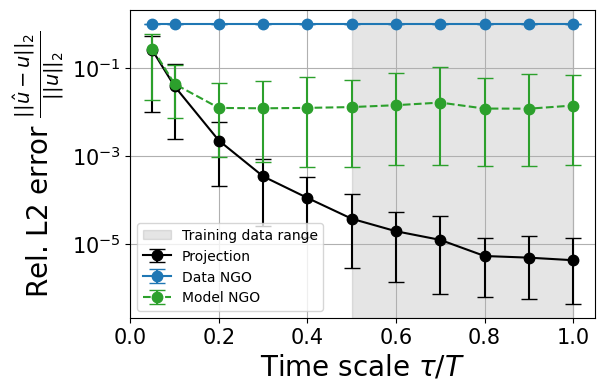

In [5]:
N_samples = 100

alpha = 0.05
q_low = alpha/2
q_high = 1 - q_low


tau = np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# tau = np.array([1])


L2_scaled_avg = np.zeros((len(modeldict),len(tau)))
yerr = np.zeros((len(modeldict),2,len(tau)))

size_title = 20
size_ticklabels = 15
size_axeslabels = 20

quadrature = GaussLegendreQuadrature(n_elements=[3,3,3], Q=[12,12,12])
x = quadrature.xi
w = quadrature.w

linestyles=['-','-','--','--','--','--','--','--','--','--']
colors = ['black','C0','C2','C3','C4']
    
for i in range(len(tau)):
    print(tau[i])
    dataset = ManufacturedSolutionsSet(N_samples=N_samples, variables=['t','x','x'], l_min=[tau[i],1,1], l_max=[tau[i],1,1], device=device)
    theta = dataset.theta
    f = dataset.f
    etat = dataset.etat
    etab = dataset.etab
    gl = dataset.gl
    gr = dataset.gr
    u = dataset.u
    u0 = dataset.u0
    m=0
    for model in modeldict:
        print(str(model))
        modeldict[str(model)].hparams['assembly_batch_size'] = N_samples
        print(f"Memory allocated: {torch.cuda.memory_allocated(device) / 1024 ** 2:.2f} MB")
        print(f"Memory reserved: {torch.cuda.memory_reserved(device) / 1024 ** 2:.2f} MB")
        u_exact = discretize_functions(u, x, dtype=modeldict[str(model)].hparams['dtype'], device=device)
        print(f"Memory allocated: {torch.cuda.memory_allocated(device) / 1024 ** 2:.2f} MB")
        print(f"Memory reserved: {torch.cuda.memory_reserved(device) / 1024 ** 2:.2f} MB")
        u_hat = modeldict[str(model)].simforward(theta, f, etab, etat, gl, gr, u0, x, u)
        print(f"Memory allocated: {torch.cuda.memory_allocated(device) / 1024 ** 2:.2f} MB")
        print(f"Memory reserved: {torch.cuda.memory_reserved(device) / 1024 ** 2:.2f} MB")
        L2_scaled_array = weightedrelativeL2_set(w, u_hat, u_exact)
        L2_scaled_avg[m,i] = np.average(L2_scaled_array)
        q_l = np.quantile(L2_scaled_array, q_low)
        q_h = np.quantile(L2_scaled_array, q_high)
        yerr[m,:,i] = np.array([L2_scaled_avg[m,i] - q_l, -L2_scaled_avg[m,i] + q_h])
        m+=1

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plots = []
plots.append(ax.axvspan(0.5,1, color='black', alpha=0.1, label='Training data range'))
m=0
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.set_xlabel(r'Time scale $\tau/T$', fontsize=size_axeslabels)
ax.set_ylabel(r'Rel. L2 error $\frac{||\hat{u}-u||_2}{||u||_2}$', fontsize=size_axeslabels)
ax.set_yscale('log')
ax.set_xlim(0, 1.05)
ax.grid()
# ax.set_title('FNO', fontsize=size_title)
for model in modeldict:
    plots.append(ax.errorbar(tau, L2_scaled_avg[m], yerr=yerr[m], fmt=".-", capsize=6, ms=15, label=str(model), color=colors[m], linestyle=linestyles[m]))
    m+=1
plt.legend(fontsize=10, ncols=1)
# legend1 = ax.legend(handles=plots[0:2],fontsize=10, ncols=1, loc='lower left')
# plt.gca().add_artist(legend1)
# legend2 = ax.legend(handles=plots[2:],fontsize=10, ncols=2, loc='upper right')
# plt.gca().add_artist(legend2)

# plt.savefig("FNO.pdf", bbox_inches='tight')#, transparent=True)
plt.savefig("timescales.svg", bbox_inches='tight')#, transparent=True)
plt.savefig("timescales.pdf", bbox_inches='tight')#, transparent=True)
plt.show()